**Projeto - Tópicos IF807 - Responsible AI**

**Grupo:**

- Felipe Neiva
- Mader Gabriel
- Rubens Lima

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

**Lendo o Dataset**

In [2]:
import os

git_file = 'https://raw.githubusercontent.com/rubdelima/IF-807---PL-Predict-Matches/main/Premier_League.csv'
file = git_file if len(los := [i for i in os.listdir() if i.endswith(".csv")]) < 1 else los[0]

df = pd.read_csv(file)
df.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [3]:
file

'https://raw.githubusercontent.com/rubdelima/IF-807---PL-Predict-Matches/main/Premier_League.csv'

In [4]:
df["home_victory"] = df.apply(lambda row : True if row['Goals Home'] > row['Away Goals'] else False, axis=1 )
df["pass_percentage"] = df.apply(lambda row : row["home_pass"]/ (row["home_pass"]+row["away_pass"]), axis=1 )
df["chances_percentage"] = df.apply(lambda row : 0 if (row["home_chances"]+row["away_chances"]) == 0 else row["home_chances"]/ (row["home_chances"]+row["away_chances"]), axis=1 )

In [5]:
unused_columns = ["Goals Home", "Away Goals", "attendance", "date", "clock", "stadium", "Home Team", "Away Team", "links"]

df = df.drop(unused_columns, axis=1)

df.head()

,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,...,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,home_victory,pass_percentage,chances_percentage
0,51.0,49.0,14,6,8,0,4,4,2,2,...,3,8,11,0,0,0,0,True,0.502825,1.000000
1,40.3,59.7,12,8,5,4,5,3,2,1,...,3,15,16,4,4,0,0,True,0.473883,0.571429
2,34.4,65.6,11,17,4,3,4,6,3,8,...,3,12,8,4,0,0,0,True,0.468953,0.666667
3,64.4,35.6,22,13,5,4,9,5,8,4,...,5,9,11,0,0,0,0,False,0.516260,0.500000
4,66.0,34.0,15,7,3,4,8,2,4,1,...,2,9,13,0,2,0,0,False,0.550771,1.000000


**Separando os conjuntos de teste e treinamento**

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['home_victory'])
Y = df['home_victory']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_set = {}
for i in (4,5,6):
   for j in (20, 25, 30, 35, 40):
    dt_set[(i,j)] = {"dt" : DecisionTreeClassifier(criterion = 'entropy',max_depth = i,min_samples_leaf = j)}
    dt_set[(i,j)]["dt"].fit(X_train, Y_train)
    dt_set[(i,j)]["accuracy"] = accuracy_score(Y_test,dt_set[(i,j)]["dt"].predict(X_test))

for k in dt_set.keys():
  print(k, dt_set[k]["accuracy"])


(4, 20) 0.6631578947368421
(4, 25) 0.6526315789473685
(4, 30) 0.7052631578947368
(4, 35) 0.7052631578947368
(4, 40) 0.7052631578947368
(5, 20) 0.6631578947368421
(5, 25) 0.6526315789473685
(5, 30) 0.7052631578947368
(5, 35) 0.7052631578947368
(5, 40) 0.7052631578947368
(6, 20) 0.6631578947368421
(6, 25) 0.6526315789473685
(6, 30) 0.7052631578947368
(6, 35) 0.7052631578947368
(6, 40) 0.7052631578947368


In [8]:
# Vamos agora selecionar os resultados com maior acurácia

# Selecionado a maior acurácia
dt_max = max(
    [x["accuracy"] for x in dt_set.values()]
  )

# Envontrando os paresq eu tiveram essa acurácia
bests_dts = [x["dt"] for x in dt_set.values() if x["accuracy"] == dt_max]

# Separando por max_depth
bests_dts_dict = {}
for dt in bests_dts:
  if dt.max_depth in bests_dts_dict.keys():
    # Vou só alternar para ter mais variância no número de samples (e diretamenta ma maior profundidade)
    if (dt.max_depth%2)^(dt.min_samples_leaf > bests_dts_dict[dt.max_depth].min_samples_leaf):
      continue
  bests_dts_dict[dt.max_depth] = dt

bests_dts = list(bests_dts_dict.values())

len(bests_dts)

3

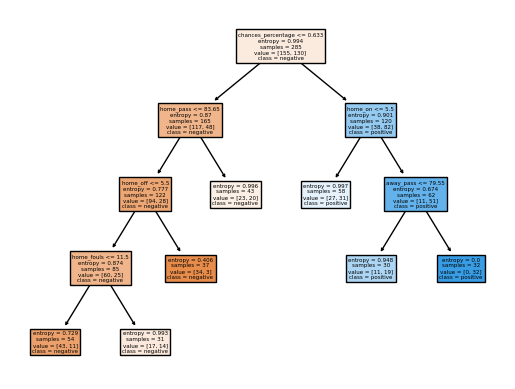

In [9]:
from sklearn import tree

tree.plot_tree(bests_dts[0], feature_names = X.columns, class_names=['negative', "positive"],filled = True);


Acurácia dos dados de teste  :  0.7052631578947368


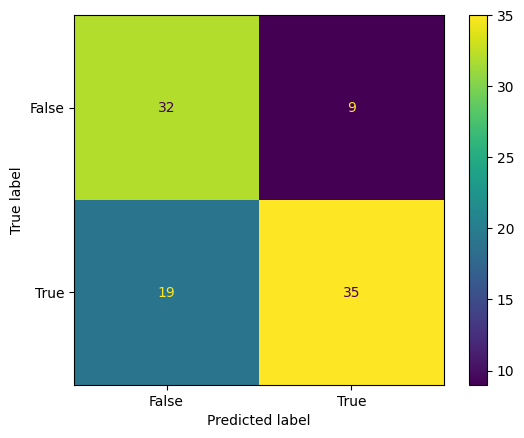

In [10]:
dt = bests_dts[0]

from sklearn.metrics import accuracy_score

Yhat = dt.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()

plt.show()

### Random Forest

In [11]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_features = 3)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=3, n_estimators=200)

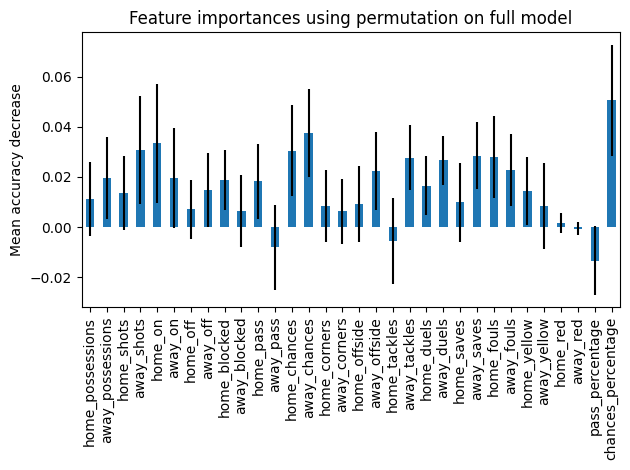

In [12]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7578947368421053


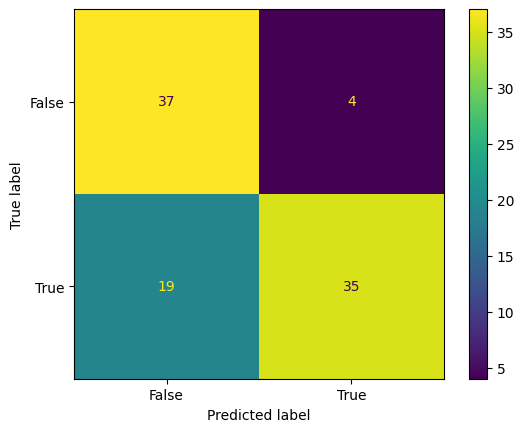

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

### KNN

In [15]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Yhat_knn = knn.predict(X_test)


## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

Yhat_lr = lr.predict(X_test)

accuracy = accuracy_score(Y_test, Yhat_lr)
print(f'Accuracy: {accuracy:.2f}')

print(f'Coefficients: {lr.coef_}')

Accuracy: 0.87
Coefficients: [[ 0.00658531 -0.06348493  0.55124342 -0.54879144  1.53174063 -1.47370568
  -0.46708212  0.49763718 -0.51341509  0.42727706 -0.10596451  0.15190784
   0.07840755 -0.12460128 -0.01236514  0.10007157  0.05809274  0.09552692
   0.01260746 -0.00940348 -0.01744948 -0.03658587  1.79034024 -2.19191626
  -0.00795912  0.13372315 -0.05781821 -0.17371877 -0.15515825 -0.10501113
  -0.01473179  0.14705626]]


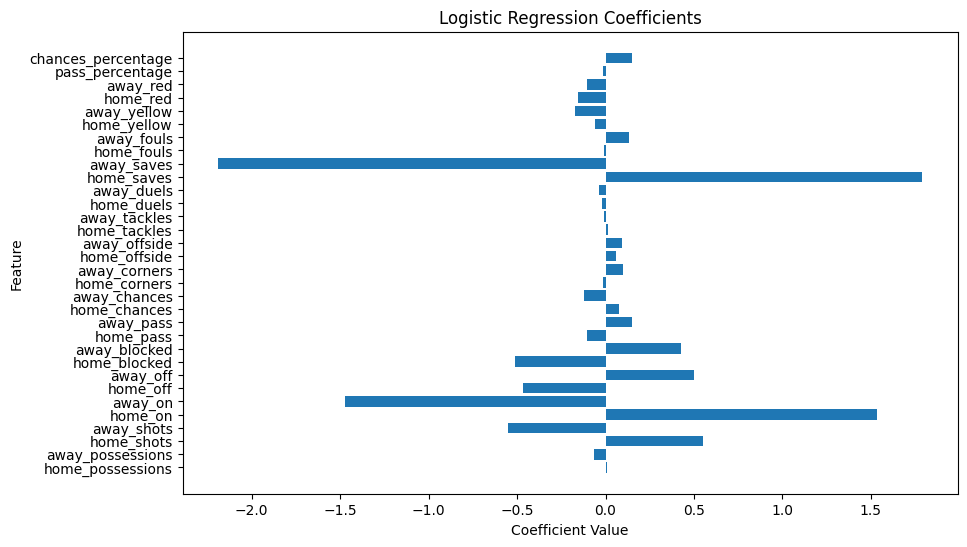

In [17]:
features = X.columns
coefficients = lr.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()